In [1]:
from Neuron_analysis_tool.load import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


In [2]:

def Rin_func(seg):
    imp = h.Impedance(seg.x, sec=seg.sec)
    imp.loc(seg.x, sec=seg.sec)
    imp.compute(0, 1)
    return imp.input(seg.x, sec=seg.sec)


In [3]:
analyser = Analyzer(type='L5PC')

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 98382.43it/s]


<AxesSubplot:>

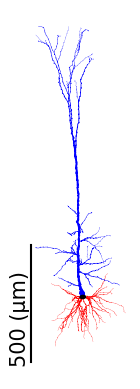

In [4]:
analyser.plot_morph(scale=500, diam_factor=0.5, theta=-90, ignore_soma=True)

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 90448.19it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / λ)', ylabel='V(x)/V(0)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / λ)'>],
       dtype=object))

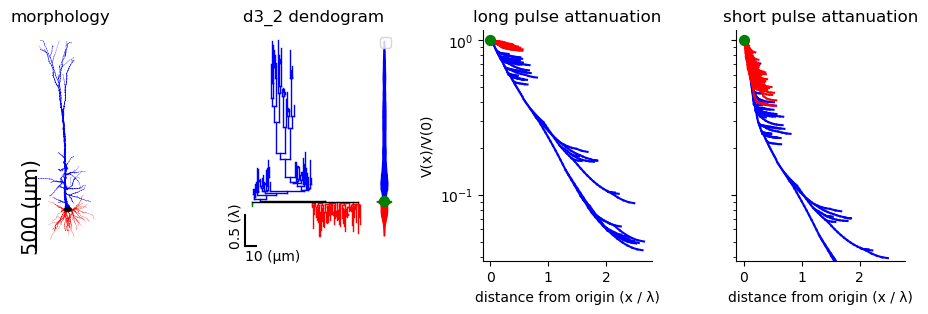

In [5]:
analyser.create_card(theta=-90, diam_factor=0.5)

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 83604.55it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / λ)', ylabel='V(x)/V(0)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / λ)'>],
       dtype=object))

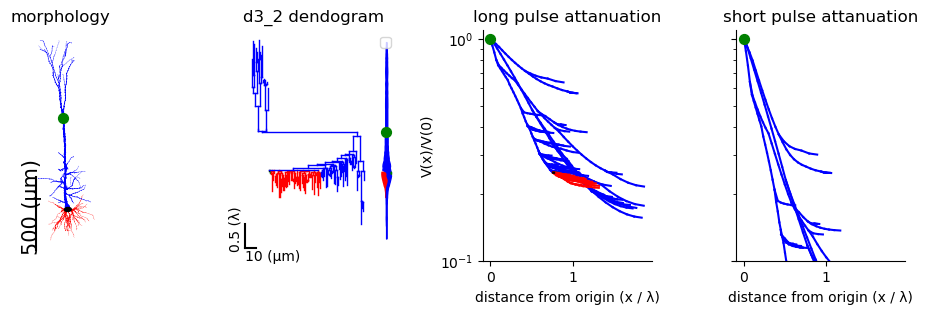

In [6]:
analyser.create_card(start_seg=list(analyser.cell.apic[50])[-1], theta=-90, diam_factor=0.5)

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 93227.90it/s]


Text(0, 0.5, 'Rin (M ohm)')

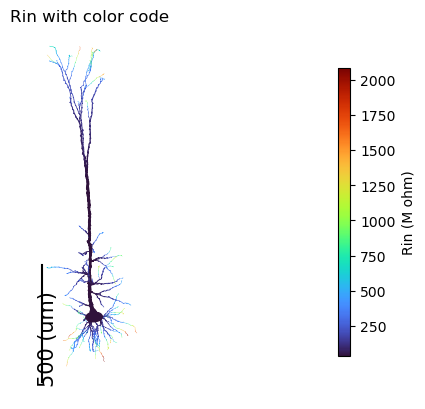

In [8]:
plt.title('Rin with color code')
analyser.plot_morph_with_value_func(func = Rin_func, run_time=1000, theta=-90, scale=500, diam_factor=0.75)
plt.ylabel('Rin (M ohm)')


In [5]:
show_records_from = dict()
show_records_from[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
show_records_from[list(analyser.cell.apic[36])[-1]] = dict(label='nexus', alpha=0.75, color='grey', size=50)


In [4]:
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, slow_down_factor=50, 
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)

NameError: name 'show_records_from' is not defined

In [ ]:
show_records_from2 = dict()
nexus_sec = list(analyser.cell.apic[60])
show_records_from2[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
show_records_from2[list(nexus_sec)[len(nexus_sec)//2]] = dict(label='nexus', alpha=0.75, color='grey', size=50)

plt.figure()
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0, record_name='gCa_LVAst_Ca_LVAst')
for sec in record_dict:
    for x in record_dict[sec]:
        record_dict[sec][x] *= 100 # change to S/cm^2 (1/10**-4)-> nS/um^2 (10**-9/10**-12) and then mul by 1000
        
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, slow_down_factor=50, 
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5,
                                          show_records_from=show_records_from2, ylabel='gCa_LVAst (\u03BCS/um^2)')
animation.ipython_display(fps=10, loop=True, autoplay=True)

In [15]:
show_records_from2

{L5PCtemplate[0].soma[0](0.25): {'label': 'soma',
  'alpha': 0.75,
  'color': 'green',
  'size': 50},
 L5PCtemplate[0].apic[60](0.541667): {'label': 'nexus',
  'alpha': 0.75,
  'color': 'grey',
  'size': 50}}

In [6]:
#change 

In [8]:
def add_syn(seg, g_AMPA=0.0004, g_NMDA=0.0004):
    netstim = h.NetStim()
    netstim.interval = 500 # fr of 1
    netstim.start = 400
    netstim.noise = 0.3
    netstim.number = 1e9
    # AMPA part
    AMPA = h.Exp2Syn(seg.x, sec=seg.sec)
    AMPA_con= h.NetCon(netstim, AMPA)
    AMPA.e = 0
    AMPA.tau1 = 0.3
    AMPA.tau2 = 1.5
    AMPA_con.weight[0] = g_AMPA
    AMPA_con.delay = 0

    # NMDA part
    NMDA=h.NMDA(seg.x, sec=seg.sec)
    NMDA_con = h.NetCon(netstim, NMDA)
    NMDA.e = 0
    NMDA.tau_r_NMDA = 8
    NMDA.tau_d_NMDA = 35
    NMDA.n_NMDA = 0.27
    NMDA.gama_NMDA = 0.076
    NMDA_con.weight[0] = g_NMDA
    NMDA_con.delay = 0
    return [AMPA, AMPA_con], [NMDA, NMDA_con], netstim

def add_isyn(seg, g_GABA=0.0004):
    netstim = h.NetStim()
    netstim.interval = 500 # fr of 1
    netstim.start = 400
    netstim.noise = 0.3
    netstim.number = 1e9
    # AMPA part
    AMPA = h.Exp2Syn(seg.x, sec=seg.sec)
    AMPA_con= h.NetCon(netstim, AMPA)
    AMPA.e = -100
    AMPA.tau1 = 0.2
    AMPA.tau2 = 4
    AMPA_con.weight[0] = g_GABA
    AMPA_con.delay = 0

    return [AMPA, AMPA_con], netstim


def random_syn_protocol(cell, start_seg):
    syns = []
    isyns = []
    for sec in np.random.choice(list(cell.all), 5000):
        x = np.random.rand()
        syns.append(add_syn(sec(x)))
    for sec in np.random.choice(list(cell.all), 100):
        x = np.random.rand()
        isyns.append(add_isyn(sec(x)))
    h.tstop = 1400
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return h.tstop, 400, 1400, 0, {}

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 84611.32it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


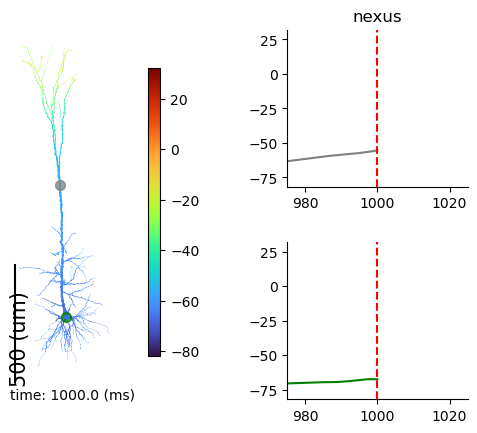

In [10]:

h.dt=0.025
h.steps_per_ms = 1.0/h.dt
record_dict, time = analyser.record_protocol(protocol=random_syn_protocol, cut_start_ms=400.0, record_name='v')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, slow_down_factor=50, 
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)


optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 84838.35it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


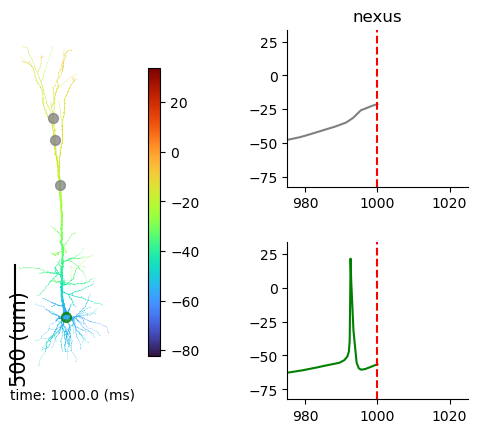

In [14]:
h.dt=0.025
h.steps_per_ms = 1.0/h.dt
record_dict, time = analyser.record_protocol(protocol=random_syn_protocol, cut_start_ms=400.0, record_name='v')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, slow_down_factor=50, 
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)

In [5]:
def Ca_spike_protocol(cell, start_seg):
    delay=400.0
    stim = h.IClamp(0.5, sec=cell.soma[0])
    stim.dur   = 5
    stim.delay = delay

    syn = h.epsp(cell.apic[36](0.9))
    syn.tau0  = 0.5
    syn.tau1 = 5
    syn.onset   = stim.delay + 5
    syn.imax = 0.5 
    stim.amp = 1.9
    
    h.tstop = 700
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return h.tstop, 400, 1400, 0, {}

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 35009.10it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


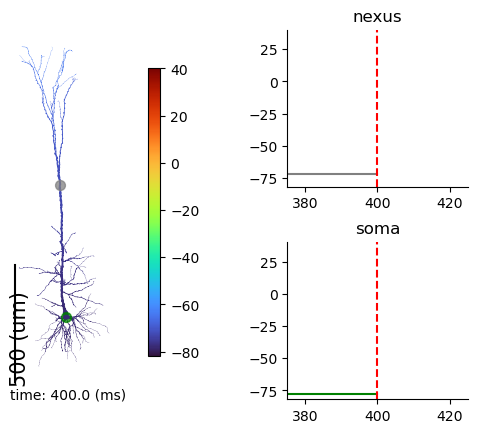

In [6]:
h.dt=0.025
h.steps_per_ms = 1.0/h.dt
record_dict, time = analyser.record_protocol(protocol=Ca_spike_protocol, cut_start_ms=300.0, record_name='v')
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, slow_down_factor=100, 
                                           func_for_missing_frames=np.max, theta=-90, diam_factor=0.5, 
                                           show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)

In [10]:
(10**-9)/(10**-12)

1000.0000000000001

In [11]:
1.0/10**-3

1000.0